*I am learning data science (and python), this is my final project for a MOOC, so be nice to me.
Any suggestion is highly appreciated*.

Enjoy

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fifa-20-complete-player-dataset/players_20.csv
/kaggle/input/fifa-20-complete-player-dataset/players_15.csv
/kaggle/input/fifa-20-complete-player-dataset/players_19.csv
/kaggle/input/fifa-20-complete-player-dataset/players_18.csv
/kaggle/input/fifa-20-complete-player-dataset/players_17.csv
/kaggle/input/fifa-20-complete-player-dataset/players_16.csv
/kaggle/input/fifa-20-complete-player-dataset/teams_and_leagues.csv
/kaggle/input/colombian-players-data/COLtop10_partidos.csv
/kaggle/input/colombian-players-data/COLtop10_minutos.csv


Import some useful libraries

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

Rearange an clean the data

In [3]:
COLtop10_minutos = pd.read_csv('/kaggle/input/colombian-players-data/COLtop10_minutos.csv')
COLtop10_partidos = pd.read_csv('/kaggle/input/colombian-players-data/COLtop10_partidos.csv')
dataset_15 = pd.read_csv('/kaggle/input/fifa-20-complete-player-dataset/players_15.csv')
dataset_16 = pd.read_csv('/kaggle/input/fifa-20-complete-player-dataset/players_16.csv')
dataset_17 = pd.read_csv('/kaggle/input/fifa-20-complete-player-dataset/players_17.csv')
dataset_18 = pd.read_csv('/kaggle/input/fifa-20-complete-player-dataset/players_18.csv')
dataset_19 = pd.read_csv('/kaggle/input/fifa-20-complete-player-dataset/players_19.csv')
dataset_20 = pd.read_csv('/kaggle/input/fifa-20-complete-player-dataset/players_20.csv')
columns_to_keep = ['sofifa_id', 'short_name','age','height_cm','weight_kg','nationality','overall','potential','player_positions','pace','shooting','passing','dribbling','defending','physic','gk_diving','gk_handling','gk_kicking','gk_reflexes','gk_speed','gk_positioning','player_traits','attacking_crossing','attacking_finishing','attacking_heading_accuracy','attacking_short_passing','attacking_volleys','skill_dribbling','skill_curve','skill_fk_accuracy','skill_long_passing','skill_ball_control','movement_acceleration','movement_sprint_speed','movement_agility','movement_reactions','movement_balance','power_shot_power','power_jumping','power_stamina','power_strength','power_long_shots','mentality_aggression','mentality_interceptions','mentality_positioning','mentality_vision','mentality_penalties','mentality_composure','defending_marking','defending_standing_tackle','defending_sliding_tackle','goalkeeping_diving','goalkeeping_handling','goalkeeping_kicking','goalkeeping_positioning','goalkeeping_reflexes','ls','st','rs','lw','lf','cf','rf','rw','lam','cam','ram','lm','lcm','cm','rcm','rm','lwb','ldm','cdm','rdm','rwb','lb','lcb','cb','rcb','rb']
#eliminar columnas innecesarias
dataset_15 = dataset_15[columns_to_keep]
dataset_16 = dataset_16[columns_to_keep]
dataset_17 = dataset_17[columns_to_keep]
dataset_18 = dataset_18[columns_to_keep]
dataset_19 = dataset_19[columns_to_keep]
dataset_20 = dataset_20[columns_to_keep]
topCOL_id = list(dataset_20.where((dataset_20['nationality'] == 'Colombia')).dropna(how='all')['sofifa_id'][:200])

This are the top 10 colombian players of FIFA 20

In [4]:
dataset_20.set_index('sofifa_id').loc[topCOL_id[:10]][['short_name']]

,short_name
sofifa_id,
198710.0,J. Rodríguez
220793.0,D. Sánchez
167397.0,Falcao
193082.0,J. Cuadrado
215333.0,D. Zapata
210513.0,J. Quintero
176550.0,D. Ospina
199110.0,L. Muriel
213991.0,J. Lerma


Let's make some useful charts, first, overall score and potential top 10 (2015/20)

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


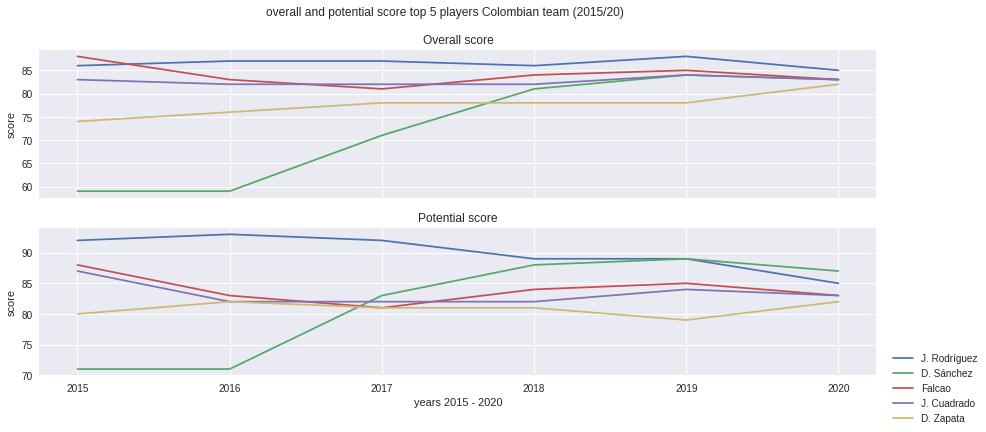

In [5]:
columns_to_keep2 = ['sofifa_id','overall','potential']
dfColtop5 = pd.read_csv('/kaggle/input/fifa-20-complete-player-dataset/players_15.csv')[columns_to_keep2].set_index('sofifa_id').loc[topCOL_id[:5]].rename(columns={'overall':'Overall_15','potential':'potential_15'})
for i in range(16,21):
    t= pd.read_csv('/kaggle/input/fifa-20-complete-player-dataset/players_{}.csv'.format(i))[['sofifa_id','overall','potential']].set_index('sofifa_id')
    dfColtop5['overall_{}'.format(i)] = t.loc[t.index.intersection(topCOL_id[:5])]['overall']
    dfColtop5['potential_{}'.format(i)] = t.loc[t.index.intersection(topCOL_id[:5])]['potential']
dfColtop5['overall_16'].iloc[1] = 59
dfColtop5['potential_16'].iloc[1] = 71;
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(15, 6))
ax1.plot(dfColtop5.T[::2])
plt.sca(ax1)
plt.xticks(list(dfColtop5.T[::2].index),[""])
plt.title('Overall score')
plt.ylabel('score')
ax2.plot(dfColtop5.T[1::2])
plt.sca(ax2)
plt.xticks(list(dfColtop5.T[1::2].index),range(2015,2021))
plt.title('Potential score')
plt.xlabel('years 2015 - 2020')
plt.ylabel('score')
fig.legend(dataset_20.set_index('sofifa_id').loc[topCOL_id[:5]]['short_name'],loc='lower right')
fig.suptitle('overall and potential score top 5 players Colombian team (2015/20)');


Now, let's look at the real life data, what about the minutes and the appearances in 2008/20?

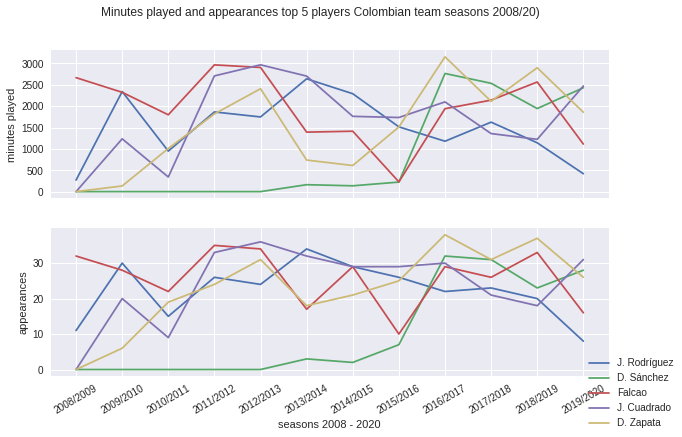

In [6]:
seasons = list()
for line in COLtop10_partidos[:5].set_index('sofifa_id').fillna(0).T.index:
    seasons.append(line.split("_")[1])
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(10, 6))
ax1.plot(COLtop10_minutos[:5].set_index('sofifa_id').fillna(0).T)
plt.sca(ax1)
plt.xticks(list(COLtop10_minutos[:5].set_index('sofifa_id').fillna(0).T.index),[""])
plt.ylabel('minutes played')
ax2.plot(COLtop10_partidos[:5].set_index('sofifa_id').fillna(0).T)
plt.sca(ax2)
plt.xticks(list(COLtop10_partidos[:5].set_index('sofifa_id').fillna(0).T.index),seasons,rotation=30)
plt.xlabel('seasons 2008 - 2020')
plt.ylabel('appearances')
fig.legend(dataset_20.set_index('sofifa_id').loc[topCOL_id[:5]]['short_name'],loc='lower right')
fig.suptitle('Minutes played and appearances top 5 players Colombian team seasons 2008/20)');

*(sorry James we know you deserve more)*

# Payer analysis
For this part I base my analysis on this work (https://www.kaggle.com/hokai999/fifa20-predict-the-best-position), here, @okai999 answered the question 'Given the 6 basic attributes, can we derive the best player position?'

Clean the data, add some columns

In [7]:
topCOL_df = dataset_20.set_index('sofifa_id').loc[topCOL_id]
topCOL_df['best_pos'] = topCOL_df['player_positions'].str.split(',').str[0]

dct_pos = {
    'ST': 'Fwd_Centre',
    'CF': 'Fwd_Centre',
    'LW': 'Fwd_Winger',
    'RW': 'Fwd_Winger',
    'CM': 'Mid_Centre',
    'CAM': 'Mid_Centre',
    'CDM': 'Mid_Centre',
    'LM': 'Mid_Side',
    'RM': 'Mid_Side',
    'CB': 'Back_Centre',
    'LB': 'Back_Side',
    'RB': 'Back_Side',
    'LWB': 'Back_Winger',
    'RWB': 'Back_Winger',
    'GK': 'Goal_Keeper'}
s = {'Back_Centre':['physic','defending','pace'],
     'Back_Side':['pace','physic','defending','dribbling'],
     'Back_Winger':['pace','physic','dribbling','defending'],
     'Mid_Centre':['pace','dribbling','physic'],
     'Mid_Side':['pace','passing','shooting','physic'],
     'Fwd_Centre':['pace','shooting','physic','dribbling'],
     'Fwd_Winger':['pace','shooting','passing'],
     'Goal_Keeper': ['overall','potential']}
topCOL_df['best_pos'] = topCOL_df['best_pos'].map(dct_pos)

Here is a chart showing the positions of the 200 best Colombian players. It seems that we are stronger in Midfielder / offensive than in defense

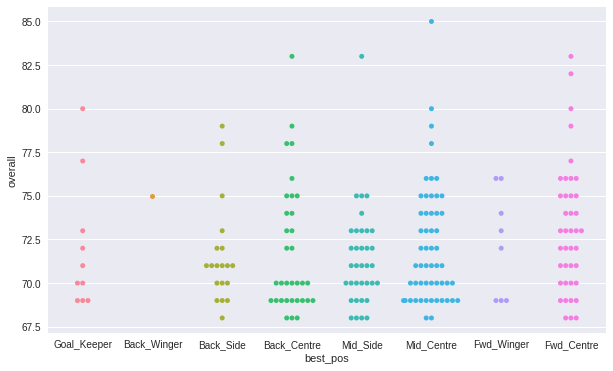

In [8]:
plt.figure(figsize=(10,6))
sns.swarmplot('best_pos', 'overall', data=topCOL_df,
              order=['Goal_Keeper','Back_Winger','Back_Side','Back_Centre','Mid_Side',
                     'Mid_Centre','Fwd_Winger','Fwd_Centre']);

So, according to @ okai999:
The heatmap tells the requirement of each position:
- Centre Defeners: Good Physic, such that you won't get crushed by the strikers
- Side (Wing) Defenders: Good defending skills and dribbling skills. You are the one to stop the counterparts and start your attack.
- Centre Midfielders: Good dribbling and passing skills is a must! You are connecting everyone in your team.
- Side Midfielders: Good passing skills and shooting skills would be useful. You are a great assistant to the strikers.
- Forward Wingers: Good shooting skills with fast pace are the definition of wingers. You are the attacker from the side.
- Centre Forward: Good dribbling and shooting skills is a must. Sometimes good physic can give you extra advantage to crush the defenders in the air!

So, let's see how our players 'fit' into those requirements, here, I choose the best attributes 2/3 and calculate the mean

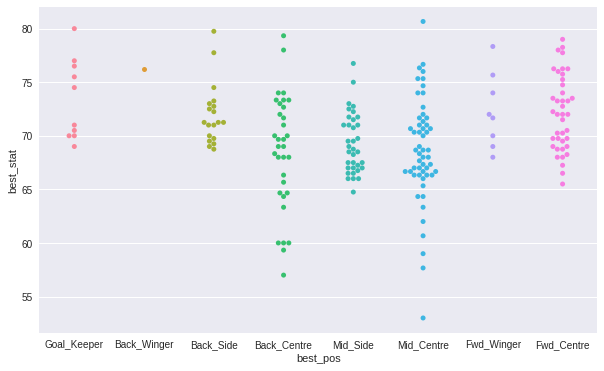

In [9]:
temp = list()
for id in topCOL_df.index:
    dataplayer = topCOL_df.loc[id]
    temp.append(dataplayer[s[dataplayer['best_pos']]].mean())
topCOL_df['best_stat'] = temp
plt.figure(figsize=(10,6))
sns.swarmplot('best_pos', 'best_stat', data=topCOL_df,
              order=['Goal_Keeper','Back_Winger','Back_Side','Back_Centre','Mid_Side',
                     'Mid_Centre','Fwd_Winger','Fwd_Centre']);

Again, seems that we are stronger in Midfielder / offensive

A summary of the positions of the 200 players

In [10]:
topCOL_df = topCOL_df.reset_index()[['best_pos','short_name','best_stat']]
topCOL_df.groupby('best_pos')[['short_name']].count()

,short_name
best_pos,
Back_Centre,33
Back_Side,19
Back_Winger,1
Fwd_Centre,40
Fwd_Winger,8
Goal_Keeper,10
Mid_Centre,54
Mid_Side,35


Who are the best players of each position?, let's see

In [11]:
numberplayers = 5
topCOL_pos_df = list()
for pos in s:
    lista = topCOL_df[topCOL_df['best_pos'] == pos].sort_values(by=['best_stat'], ascending=False)
    if len(lista) == 1:
        topCOL_pos_df.append(list(lista.iloc[0]))
    else:
        for i in range(min(len(lista),numberplayers)):
            topCOL_pos_df.append(list(lista.iloc[i]))
topCOL_pos_df = pd.DataFrame(data=topCOL_pos_df,columns=['best_pos','short_name','best_stat'])
topCOL_pos_df = topCOL_pos_df.set_index(['best_pos','best_stat'])
topCOL_pos_df

short_name
best_pos    best_stat              
Back_Centre 79.333333    D. Sánchez
            78.000000    J. Murillo
            74.000000    J. Murillo
            74.000000   A. Mosquera
            73.333333  D. Bocanegra
Back_Side   79.750000      F. Fabra
            77.750000      S. Arias
            74.500000      C. Borja
            73.250000   D. Banguero
            73.000000     S. Medina
Back_Winger 76.250000     J. Mojica
Mid_Centre  80.666667      A. Tello
            76.666667    K. Balanta
            76.333333      D. Chará
            76.000000      M. Uribe
            75.333333      J. Lerma
Mid_Side    76.750000   J. Cuadrado
            75.000000      J. Otero
            73.000000       L. Díaz
            72.750000   F. Castillo
            72.500000   L. Quiñones
Fwd_Centre  79.000000     L. Muriel
            78.250000    A. Hurtado
            78.000000    J. Córdoba
            77.750000     D. Zapata
            76.250000      R. Borré
Fwd_Winger  78.333333      D. Pabón
            75.666667      F. Pardo
            74.000000  J. Izquierdo
            72.000000      A. Plata
            71.666667     M. Moreno
Goal_Keeper 80.000000     D. Ospina
            77.000000     C. Vargas
            76.500000   I. Arboleda
            75.500000    A. Montero
            74.500000   G. Banguera

Now, our prediction is not far to the actual data (https://en.wikipedia.org/wiki/Colombia_national_football_team), not too shabby.

## Colombian players compared to other players

Choose the top 200 players of some countries

In [12]:
topCOL_id = list(dataset_20.where((dataset_20['nationality'] == 'Colombia')).dropna(how='all')['sofifa_id'][:200])
topARG_id = list(dataset_20.where((dataset_20['nationality'] == 'Argentina')).dropna(how='all')['sofifa_id'][:200])
topBRZL_id = list(dataset_20.where((dataset_20['nationality'] == 'Brazil')).dropna(how='all')['sofifa_id'][:200])
topMEX_id = list(dataset_20.where((dataset_20['nationality'] == 'Mexico')).dropna(how='all')['sofifa_id'][:200])
topBEL_id = list(dataset_20.where((dataset_20['nationality'] == 'Belgium')).dropna(how='all')['sofifa_id'][:200])
topFRA_id = list(dataset_20.where((dataset_20['nationality'] == 'France')).dropna(how='all')['sofifa_id'][:200])
topENG_id = list(dataset_20.where((dataset_20['nationality'] == 'England')).dropna(how='all')['sofifa_id'][:200])
top_id = np.array([topBRZL_id,topARG_id,topCOL_id]).flat[0:]

In [13]:
top_stats_df1 = dataset_20.set_index('sofifa_id')[['short_name','age','height_cm','weight_kg','nationality']].loc[top_id]
top_stats_df2 = dataset_20.set_index('sofifa_id')[['overall','potential','nationality']].loc[top_id]
top_stats_df3 = dataset_20.set_index('sofifa_id')[['pace','shooting','passing','dribbling','defending','physic','nationality']].loc[top_id]

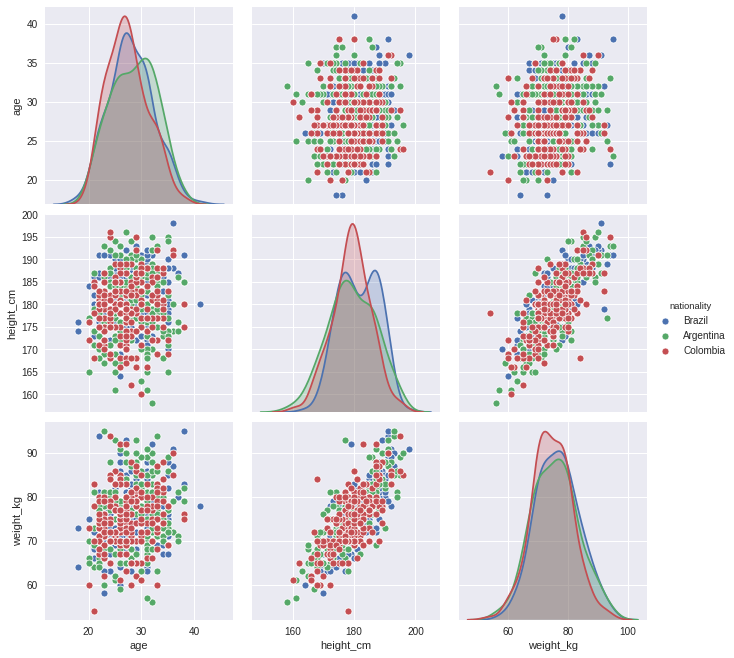

In [14]:
sns.pairplot(top_stats_df1 , hue='nationality', diag_kind='kde', height=3);

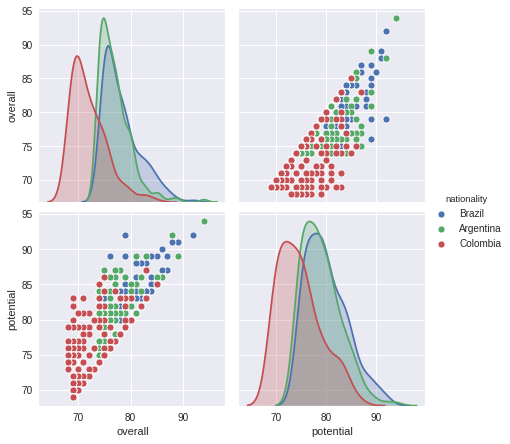

In [15]:
sns.pairplot(top_stats_df2 , hue='nationality', diag_kind='kde', height=3);

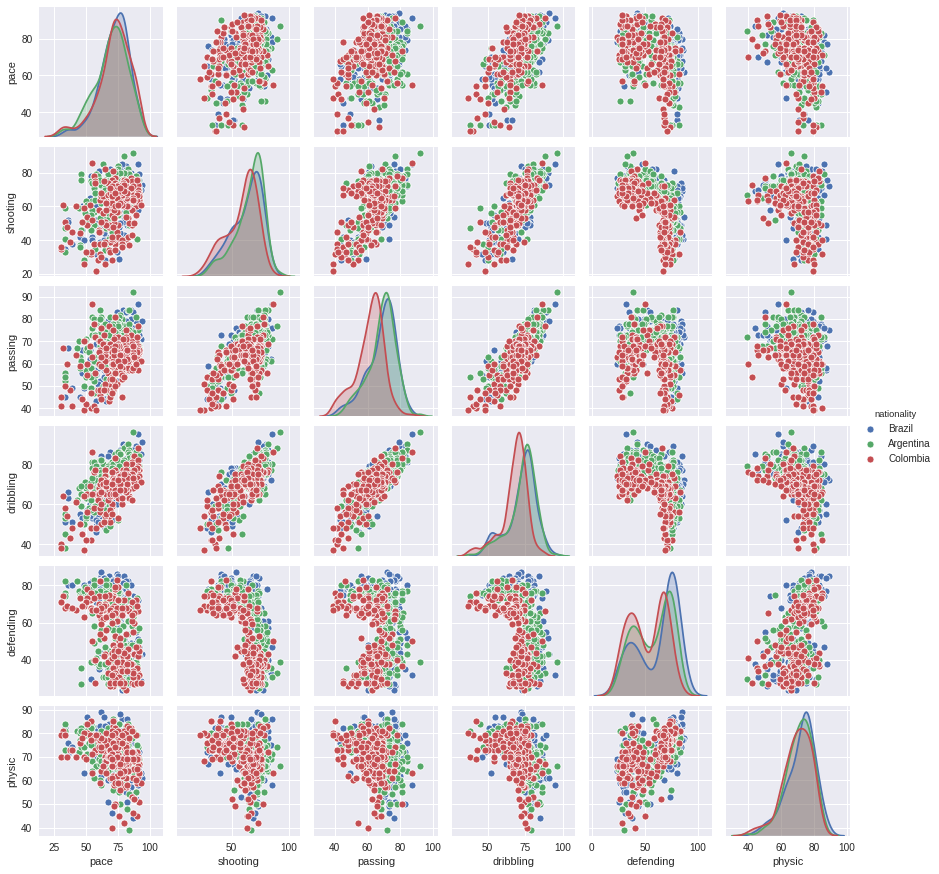

In [16]:
sns.pairplot(top_stats_df3 , hue='nationality', diag_kind='kde', height=2);

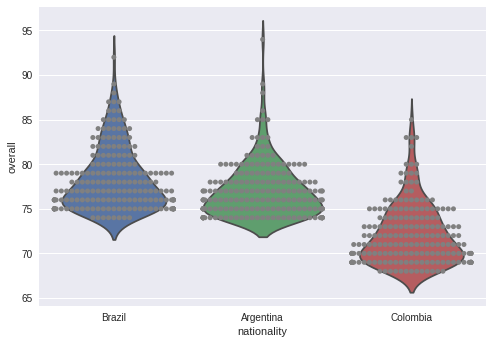

In [17]:
sns.violinplot('nationality', 'overall', data=top_stats_df2,inner=None);
sns.swarmplot('nationality', 'overall', data=top_stats_df2,color="gray",
              edgecolor="black");

So compared to Brazil and Argentina (better teams?), The Colombian team is below its statistics. How about comparing Colombia to Mexico (tenth and eleventh place in the FIFA ranking)

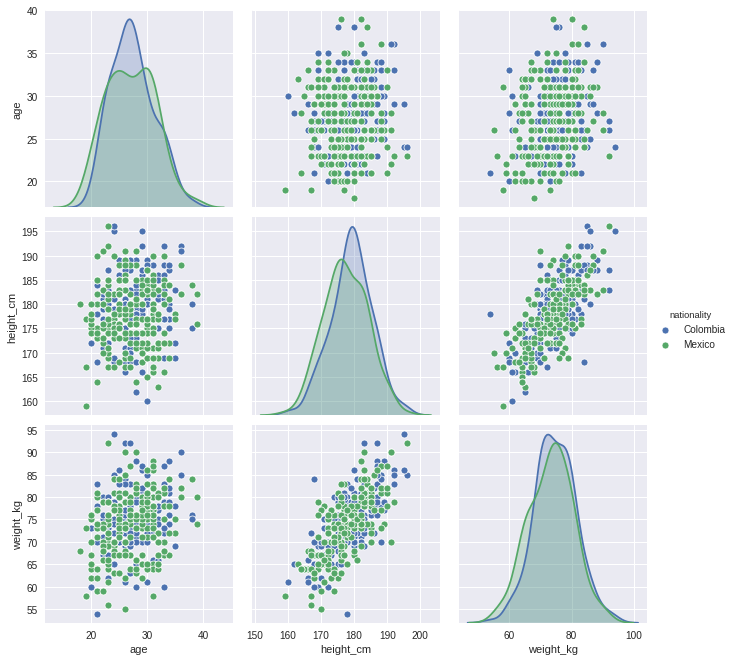

In [18]:
top_id = np.array([topCOL_id, topMEX_id]).flat[0:]

#dataset estadísticas top jugadores
top_stats_df1 = dataset_20.set_index('sofifa_id')[['short_name','age','height_cm','weight_kg','nationality']].loc[top_id]
top_stats_df2 = dataset_20.set_index('sofifa_id')[['overall','potential','nationality']].loc[top_id]
top_stats_df3 = dataset_20.set_index('sofifa_id')[['pace','shooting','passing','dribbling','defending','physic','nationality']].loc[top_id]
sns.pairplot(top_stats_df1 , hue='nationality', diag_kind='kde', height=3);

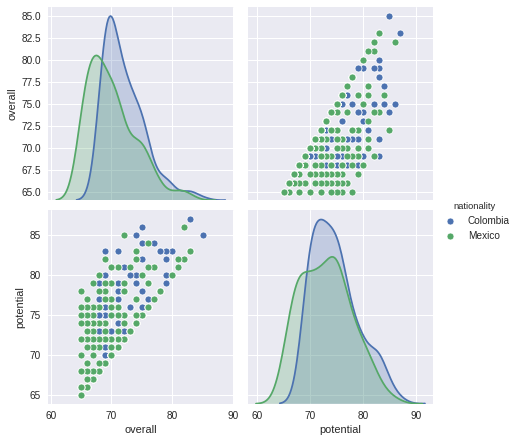

In [19]:
sns.pairplot(top_stats_df2 , hue='nationality', diag_kind='kde', height=3);

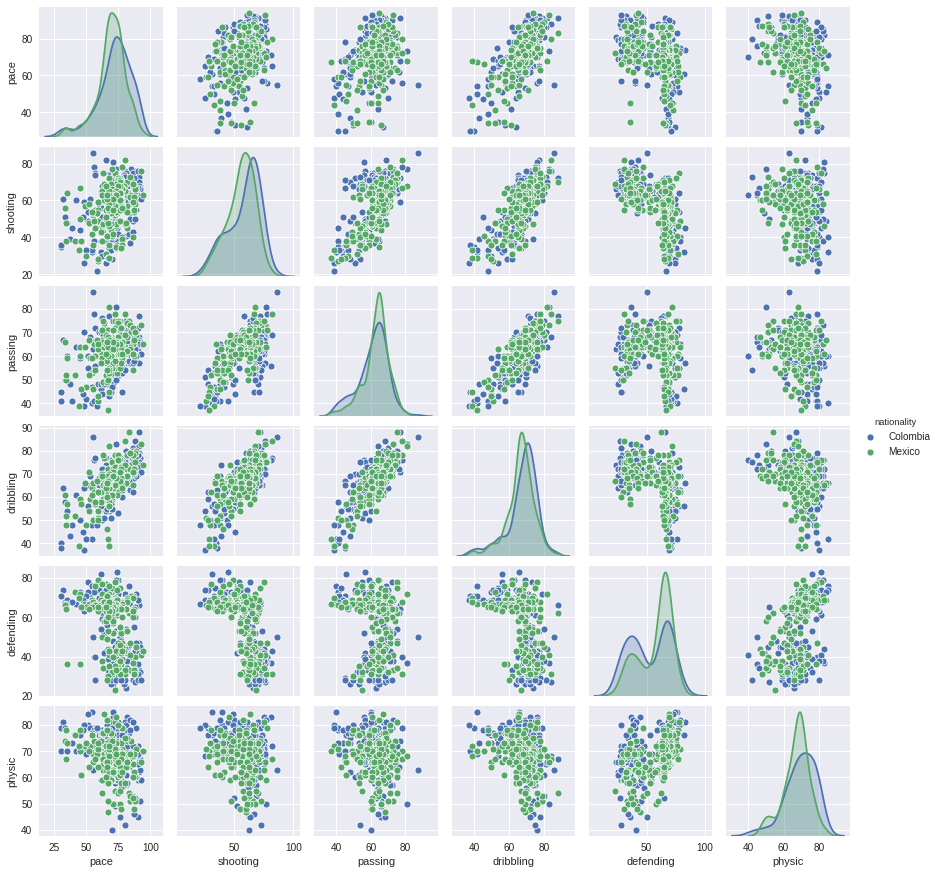

In [20]:
sns.pairplot(top_stats_df3 , hue='nationality', diag_kind='kde', height=2);

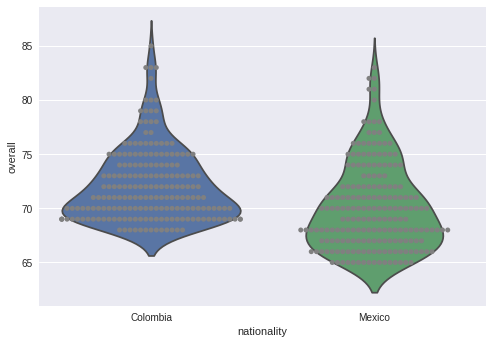

In [21]:
sns.violinplot('nationality', 'overall', data=top_stats_df2,inner=None);
sns.swarmplot('nationality', 'overall', data=top_stats_df2,color="gray",
              edgecolor="black");